**<h2>COVID19 confirmed cases prediction</h2>**

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import numpy as np

**<h2>Loading data</h2>**

In [5]:
import pandas as pd
df_india = pd.read_excel('/content/drive/My Drive/coivid_india.xlsx', index_col=None) 
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [11]:
df_india.drop(['S. No.'], axis=1,inplace=True)
df_india.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,9,0,0,0
1,Bihar,3,0,0,1
2,Chhattisgarh,1,0,0,0
3,Delhi,30,1,6,1
4,Gujarat,32,1,0,1


In [12]:
df_india.rename(columns={"Name of State / UT": "state", "Total Confirmed cases (Indian National)": "india_national", "Total Confirmed cases ( Foreign National )": "foreign_national"},inplace=True)
df_india.head()

,state,india_national,foreign_national,Cured,Death
0,Andhra Pradesh,9,0,0,0
1,Bihar,3,0,0,1
2,Chhattisgarh,1,0,0,0
3,Delhi,30,1,6,1
4,Gujarat,32,1,0,1


In [8]:
per_day_india = pd.read_excel('/content/drive/My Drive/per_day_cases.xlsx', sheet_name='India')
per_day_india.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [10]:
per_day_korean = pd.read_excel('/content/drive/My Drive/per_day_cases.xlsx', sheet_name='Korea')
per_day_italy = pd.read_excel('/content/drive/My Drive/per_day_cases.xlsx', sheet_name='Italy')
per_day_wuhan = pd.read_excel('/content/drive/My Drive/per_day_cases.xlsx', sheet_name='Wuhan')
per_day_korean.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


In [15]:
df_india['tot_cases'] = df_india['india_national']+df_india['foreign_national']
df_india['active'] = df_india['tot_cases'] - df_india['Cured'] - df_india['Death']
tot_cases = df_india['tot_cases'].sum()
print('Total cases across india', tot_cases)

Total cases across india 562


In [118]:
df_india

,state,india_national,foreign_national,Cured,Death,tot_cases,active
0,Andhra Pradesh,9,0,0,0,9,9
1,Bihar,3,0,0,1,3,2
2,Chhattisgarh,1,0,0,0,1,1
3,Delhi,30,1,6,1,31,24
4,Gujarat,32,1,0,1,33,32
5,Haryana,14,14,11,0,28,17
6,Himachal Pradesh,3,0,0,1,3,2
7,Karnataka,41,0,3,1,41,37
8,Kerala,101,8,4,0,109,105
9,Madhya Pradesh,9,0,0,0,9,9


Observations:
1. Kerala and Maharashtra states has very high number of cases across india
2. Total deaths are 9 till march 22
3. No.of carona cases of foreign nationals are high in Haryana and Telangana state


In [18]:
df_india['state'].nunique()

25

**<h2>Exploratory Data Analysis</h2>**

In [0]:

def stack_plot(data, xtick, col2='y', col3='total'):     
    ind = np.arange(data.shape[0])          
    plt.figure(figsize=(20,5))     
    p1 = plt.bar(ind, data[col3].values)     
    p2 = plt.bar(ind, data[col2].values) 
    plt.xticks(rotation=90,fontsize=20)
    plt.ylabel('No.of records')     
    plt.title('% of cured cases')     
    plt.xticks(ind, list(data[xtick].values))     
    plt.legend((p1[0], p2[0]), ('total', 'cured cases'))     
    plt.show()

**<h2>Analysing no.of cured to Total no.of confirmed cases</h2>**

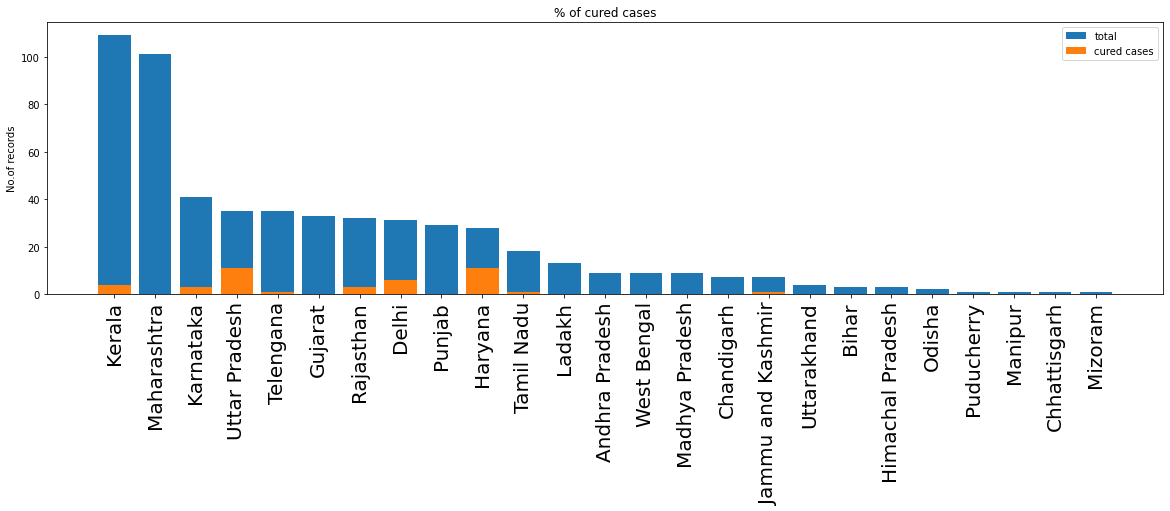

            state  tot_cases  Cured  Death  avg_cured_per_tot
8          Kerala        109      4      0           0.036697
10    Maharashtra        101      0      2           0.000000
7       Karnataka         41      3      1           0.073171
22  Uttar Pradesh         35     11      0           0.314286
18      Telengana         35      1      0           0.028571
           state  tot_cases  Cured  Death  avg_cured_per_tot
13        Odisha          2      0      0                0.0
14    Puducherry          1      0      0                0.0
11       Manipur          1      0      0                0.0
2   Chhattisgarh          1      0      0                0.0
12       Mizoram          1      0      0                0.0


In [34]:

         
temp =df_india.sort_values(by=['tot_cases'], ascending=False)
temp['avg_cured_per_tot'] = temp['Cured']/temp['tot_cases'] 
stack_plot(temp, xtick='state', col2='Cured', col3='tot_cases')  
temp = temp[['state','tot_cases','Cured','Death','avg_cured_per_tot']]
print(temp.head())   
print("="*50)
print(temp.tail())

Observations:

1. Here we are analysing cured feature based on total no.of cases.
2. Eventhough no.of cured total is less, it is not bad as most of the people from total cases are still in treatment
3. Uttar pradesh has highest cured ratio till no with no fatalities

**<h3>Analysing Death feature based on total resolved cases</h3>**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


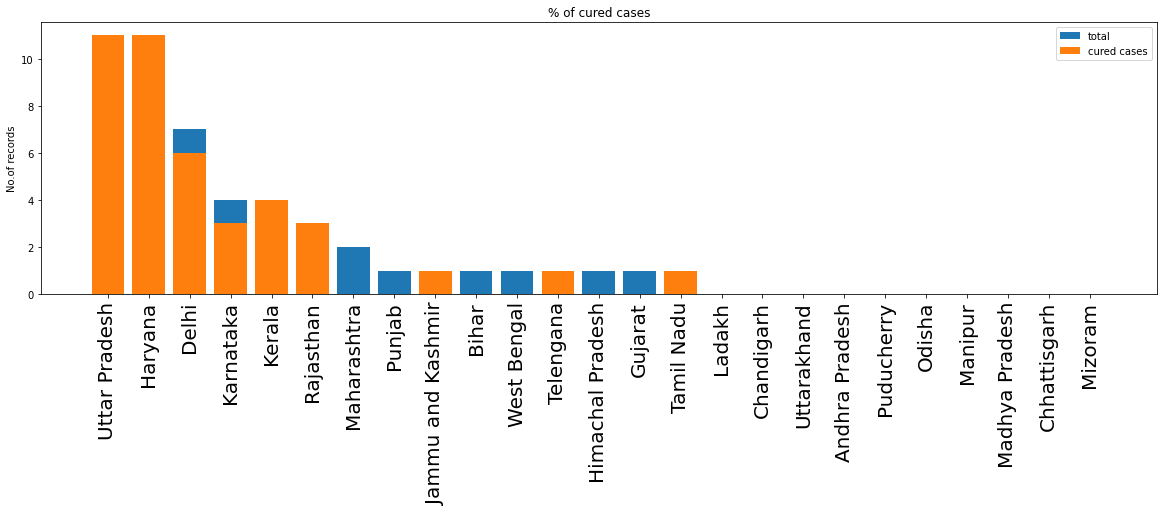

                state  tot_resolved  Cured  Death  avg_cured_per_tot_resolved
22      Uttar Pradesh            11     11      0                    1.000000
5             Haryana            11     11      0                    1.000000
3               Delhi             7      6      1                    0.857143
7           Karnataka             4      3      1                    0.750000
8              Kerala             4      4      0                    1.000000
16          Rajasthan             3      3      0                    1.000000
10        Maharashtra             2      0      2                    0.000000
15             Punjab             1      0      1                    0.000000
20  Jammu and Kashmir             1      1      0                    1.000000
1               Bihar             1      0      1                    0.000000
             state  tot_resolved  Cured  Death  avg_cured_per_tot_resolved
13          Odisha             0      0      0                     

In [35]:

temp = df_india[['state','active','Death','tot_cases','Cured']]  
temp['tot_resolved'] = temp['Death']+temp['Cured']
temp = temp.sort_values(by=['tot_resolved'], ascending=False)
temp['avg_cured_per_tot_resolved'] = temp['Cured']/temp['tot_resolved'] 
stack_plot(temp, xtick='state', col2='Cured', col3='tot_resolved')  
temp = temp[['state','tot_resolved', 'Cured','Death','avg_cured_per_tot_resolved']]
print(temp.head(10))   
print("="*100)
print(temp.tail())

Observations:
1. Here we are analysing theresolved/closed cases. 
2. As the total no.of resolved cases is very low it is difficult to get inference about which state has highest cured ratio
3. Uttar pradesh and haryana has no fatalities at all. All patients from the resolved cases got cured

**<h2>Analysing the spread of Corona virus in India, Italy, Wuhan and SOuth Korea</h2>**

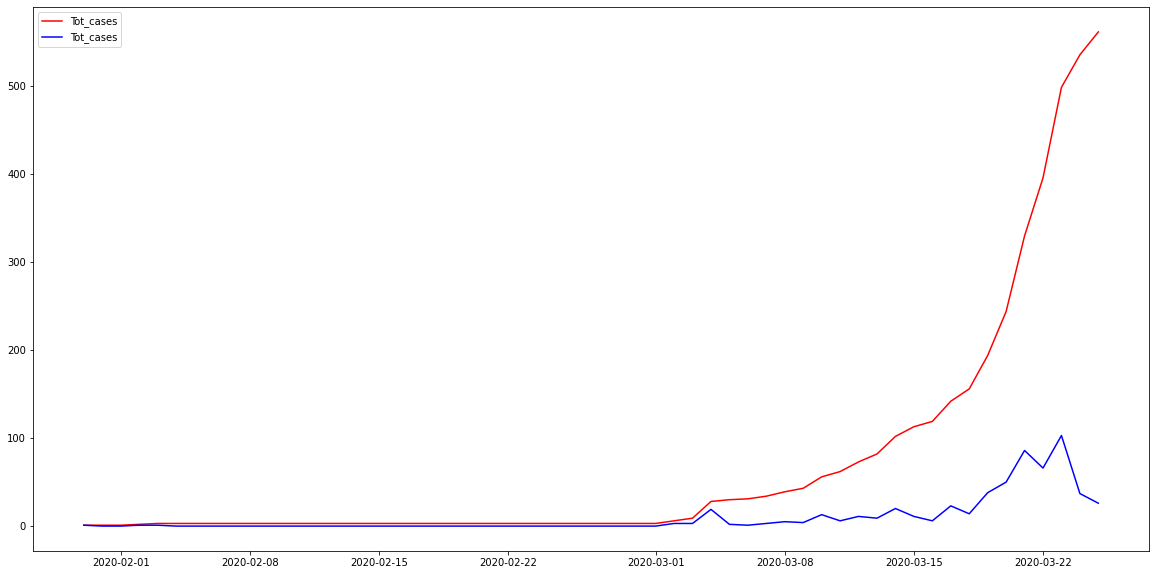

In [57]:
plt.figure(figsize=(20,10))

plt.plot(per_day_india['Date'], per_day_india['Total Cases'],label = 'Tot_cases',color='red')
plt.plot(per_day_india['Date'], per_day_india['New Cases'],label = 'Tot_cases',color='blue')
plt.legend()

Observations:

1. Till 3rd march no.of cases are in control and after 3rd march new cases are starts rising
2. There is sudden increase in new cases from 17th march to 24th march and its start falling after 24th march

In [119]:
per_day_korean.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


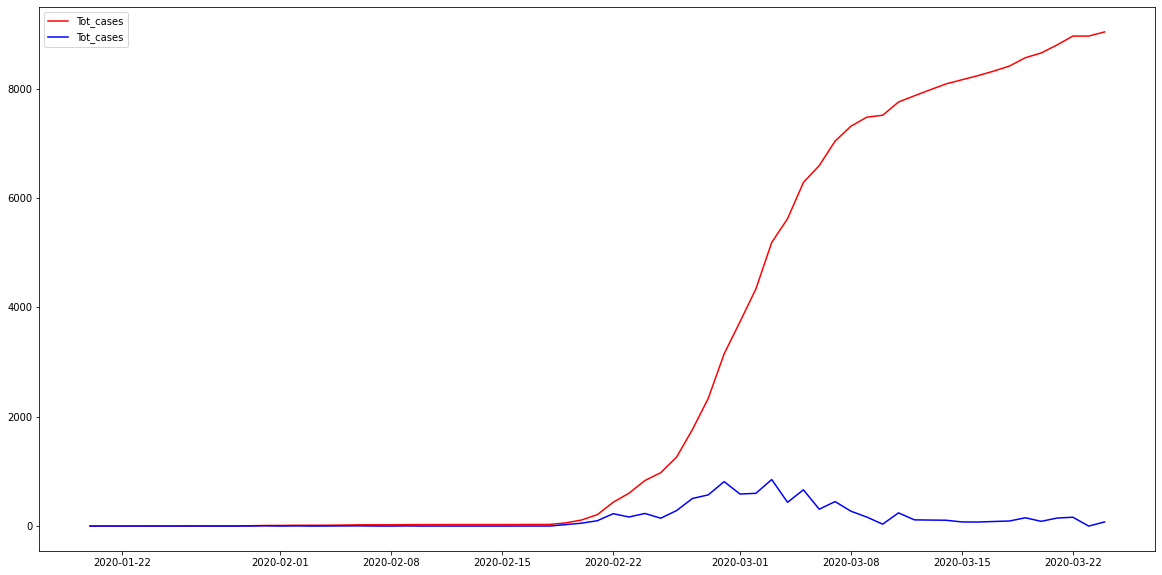

In [44]:
plt.figure(figsize=(20,10))

plt.plot(per_day_korean['Date'], per_day_korean['Total Cases'],label = 'Tot_cases',color='red')
plt.plot(per_day_korean['Date'], per_day_korean['New Cases'],label = 'Tot_cases',color='blue')
plt.legend()

Observations:
1. Till 20th Feb no.of cases are in control in korea
2. There is sudden increase in new cases from 22nd feb to 8th march
3. No.of new cases starts reducing after 8th march

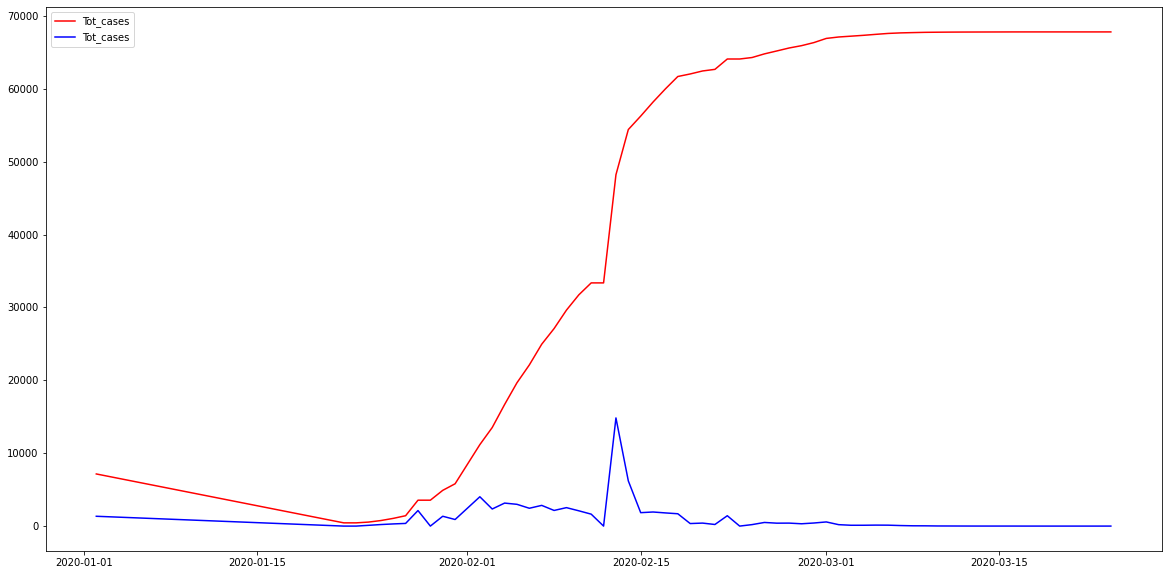

In [55]:
plt.figure(figsize=(20,10))
per_day_wuhan.sort_values(by='Date',inplace=True)
plt.plot(per_day_wuhan['Date'], per_day_wuhan['Total Cases'],label = 'Tot_cases',color='red')
plt.plot(per_day_wuhan['Date'], per_day_wuhan['New Cases'],label = 'Tot_cases',color='blue')
plt.legend()

Observations:
1. We all know that the birth of COVID is in wuhan. This is the reason no.of cases initially starts with a high number.
2. No.of new cases in wuhan slowly starts falling after 14th march becaause of the measures taken bythe government

In [58]:
per_day_wuhan.head()

,Date,Total Cases,New Cases
10,2020-01-02,7153,1347
0,2020-01-22,444,0
1,2020-01-23,444,0
2,2020-01-24,549,105
3,2020-01-25,761,212


In [54]:
per_day_wuhan[per_day_wuhan.Date <= '2020-01-21']

,Date,Total Cases,New Cases
10,2020-01-02,7153,1347


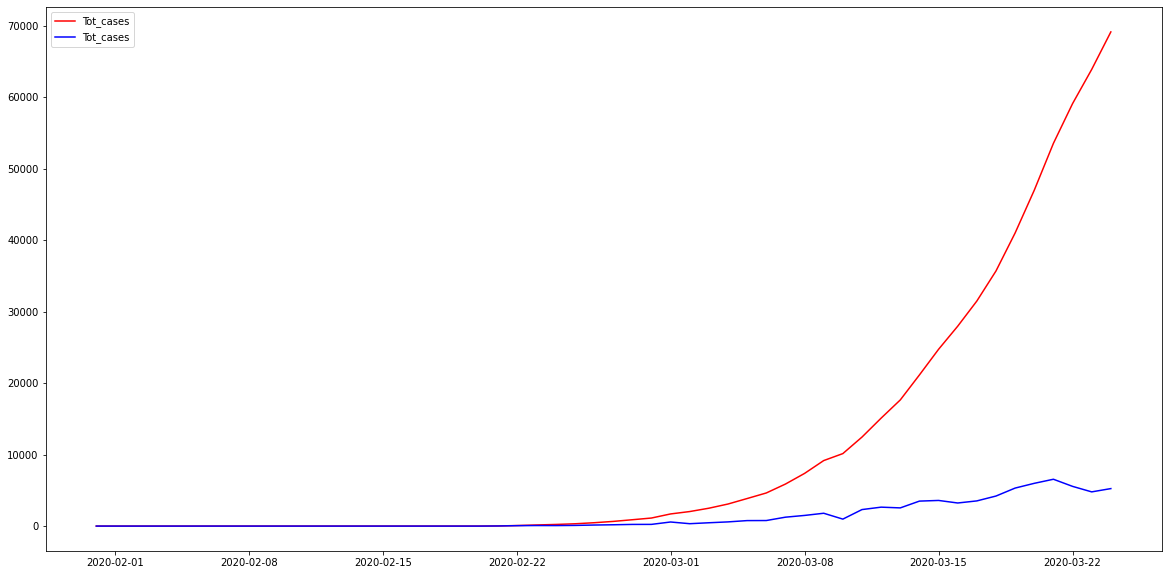

In [60]:
plt.figure(figsize=(20,10))
per_day_italy.sort_values(by='Date',inplace=True)
plt.plot(per_day_italy['Date'], per_day_italy['Total Cases'],label = 'Tot_cases',color='red')
plt.plot(per_day_italy['Date'], per_day_italy['New Cases'],label = 'Tot_cases',color='blue')
plt.legend()

In [120]:
per_day_italy.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN


Observations:
1. No.of new cases strats increasing in italy after 1st march and there is continous increase in new cases till 22nd march

**<h2>Analysing world wide covid cases</h2>**

In [0]:
from fbprophet import Prophet

In [121]:

df_complete = pd.read_csv('/content/drive/My Drive/covid_19_clean_complete.csv') 

df_complete.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [0]:
confirmed_val = df_complete.groupby('Date').sum()['Confirmed'].reset_index()
death_val = df_complete.groupby('Date').sum()['Deaths'].reset_index()
recovered_val = df_complete.groupby('Date').sum()['Recovered'].reset_index()

In [73]:
confirmed_val.head()

,Date,Confirmed
0,1/22/20,554.0
1,1/23/20,652.0
2,1/24/20,939.0
3,1/25/20,1432.0
4,1/26/20,2113.0


In [75]:
confirmed_val.shape

(62, 2)

**<h3>Analysis of Death,Confirmed and Recovered features</h3>**

In [78]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=confirmed_val['Date'], y=confirmed_val['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=death_val['Date'], y=death_val['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red')))
fig.add_trace(go.Scatter(x=recovered_val['Date'], y=recovered_val['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green')))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='No.of Cases'))

fig.show()

**<h2>Forecasting Total no.of cases world wide</h2>**

**<h3>Building Prophet model for time series prediction</h3>**

In [0]:
confirmed_val.columns = ['ds','y']
confirmed_val['ds'] = pd.to_datetime(confirmed_val['ds'])
confirmed_val=confirmed_val.sort_values(by='ds')

In [95]:
confirmed_val.shape

(62, 2)

In [94]:
print(confirmed_val.head())
print("="*100)
print(confirmed_val.tail())

          ds       y
0 2020-01-22   554.0
1 2020-01-23   652.0
2 2020-01-24   939.0
3 2020-01-25  1432.0
4 2020-01-26  2113.0
           ds         y
49 2020-03-19  242708.0
51 2020-03-20  272166.0
52 2020-03-21  304524.0
53 2020-03-22  335955.0
54 2020-03-23  336004.0


In [112]:
confirmed_model = Prophet(interval_width=0.95)
confirmed_model.fit(confirmed_val)
future_confirmed = confirmed_model.make_future_dataframe(periods=7)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [113]:
future_confirmed.tail()

,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [114]:
future_confirmed.shape

(69, 1)

In [115]:
confirmed_val.tail()

,ds,y
49,2020-03-19,242708.0
51,2020-03-20,272166.0
52,2020-03-21,304524.0
53,2020-03-22,335955.0
54,2020-03-23,336004.0


In [116]:

forecast = confirmed_model.predict(future_confirmed)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,334173.399230,375480.008568
65,2020-03-27,372235.326938,351718.428175,392774.179013
66,2020-03-28,388674.964143,367895.256739,408744.290803
67,2020-03-29,405307.954675,383373.621866,426489.843168
68,2020-03-30,418529.648466,394097.302232,439375.092194


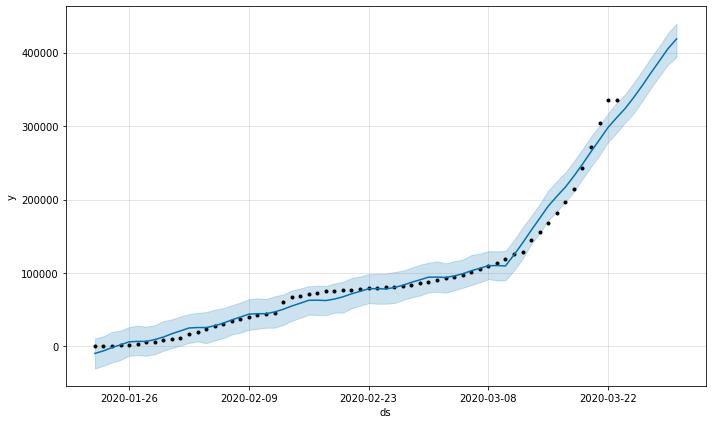

In [117]:
confirmed_forecast_plot = confirmed_model.plot(forecast)

Observation:
1. We trained the prophet model by mentioning that we need predictions with 95% confidence
2. we obtain predicted value and lower bound and upper bound ratio to understand the number of cases value range